# Police Activity Data Science Project

### 1.0 Import Dependencies

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.0 Exploring the Dataset

In [2]:
# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

In [5]:
# Get the shape of the data. 15 columns by 91,741 rows
ri.shape

(91741, 15)

In [6]:
# Get the column names
ri.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [7]:
# Examine the head of the DataFrame
print(ri.head())

  state   stop_date stop_time  county_name driver_gender driver_race  \
0    RI  2005-01-04     12:55          NaN             M       White   
1    RI  2005-01-23     23:15          NaN             M       White   
2    RI  2005-02-17     04:15          NaN             M       White   
3    RI  2005-02-20     17:15          NaN             M       White   
4    RI  2005-02-24     01:20          NaN             F       White   

                    violation_raw  violation  search_conducted search_type  \
0  Equipment/Inspection Violation  Equipment             False         NaN   
1                        Speeding   Speeding             False         NaN   
2                        Speeding   Speeding             False         NaN   
3                Call for Service      Other             False         NaN   
4                        Speeding   Speeding             False         NaN   

    stop_outcome is_arrested stop_duration  drugs_related_stop district  
0       Citation       F

### 2.1 Deleting non-important data

In [8]:
# Count the number of missing values in each column
print(ri.isnull().sum())

state                     0
stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [9]:
# Drop the 'county_name' and 'state' columns
# All county columns are NaNs and are useless
# All state entries are the same, for Rhode Island and of no use since it is a meta property of the data
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

In [11]:
ri.shape # the two deleted columns are now missing

(91741, 13)

In [12]:
# Count the number of missing values in each column
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender          5205
driver_race            5202
violation_raw          5202
violation              5202
search_conducted          0
search_type           88434
stop_outcome           5202
is_arrested            5202
stop_duration          5202
drugs_related_stop        0
district                  0
dtype: int64


In [13]:
# 5205 of 91741 rows are missing (~5%)
# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

In [14]:
# Examine the shape of the DataFrame
print(ri.shape)
# This is a common machine learning manuever as well

(86536, 13)


In [15]:
# Count the number of missing values in each column (again)
print(ri.isnull().sum())

stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           83229
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64


### 2.2 Inspecting and Fixing Data Types

In [16]:
ri.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [18]:
# objects - these are any of various Python object types
# bool - these are logical booleans

# The "is_arrested" column should be boolean. Was the person arrested or not is of value in analysis.

# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object


In [21]:
# Let's verify the values in the "is_arrested" column
ri.is_arrested.unique()

array([False,  True])

In [19]:
# For some reason, it's datatype is 'object' - meaning it's most likely interpreted as strings
# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

In [20]:
# Check the data type of 'is_arrested' 
print(ri.dtypes)

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


### 2.2 Adjust the Date-Time column

In [23]:
print(ri.stop_date.head(), ri.stop_time.head())

0    2005-01-04
1    2005-01-23
2    2005-02-17
3    2005-02-20
4    2005-02-24
Name: stop_date, dtype: object 0    12:55
1    23:15
2    04:15
3    17:15
4    01:20
Name: stop_time, dtype: object


In [25]:
# Let's combine and convert the columns into a standard date-time indexed column
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined

0        2005-01-04 12:55
1        2005-01-23 23:15
2        2005-02-17 04:15
3        2005-02-20 17:15
4        2005-02-24 01:20
               ...       
91736    2015-12-31 21:21
91737    2015-12-31 21:59
91738    2015-12-31 22:04
91739    2015-12-31 22:09
91740    2015-12-31 22:47
Name: stop_date, Length: 86536, dtype: object

In [26]:
# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

In [27]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object

In [28]:
# Take a peek at some of the values to confirm they look right
ri.stop_datetime.head()

0   2005-01-04 12:55:00
1   2005-01-23 23:15:00
2   2005-02-17 04:15:00
3   2005-02-20 17:15:00
4   2005-02-24 01:20:00
Name: stop_datetime, dtype: datetime64[ns]

In [29]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)
ri.index

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2015-12-31 13:23:00', '2015-12-31 18:59:00',
               '2015-12-31 19:13:00', '2015-12-31 20:20:00',
               '2015-12-31 20:50:00', '2015-12-31 21:21:00',
               '2015-12-31 21:59:00', '2015-12-31 22:04:00',
               '2015-12-31 22:09:00', '2015-12-31 22:47:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=86536, freq=None)

In [30]:
# Confirm the 'stop_datetime' column is no longer in the dataframe since it is now the index
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')

## 3.0 - Analysis of Gender and Policing

### 3.1 Stop Outcome Based on Gender

In [31]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

Speeding               48423
Moving violation       16224
Equipment              10921
Other                   4409
Registration/plates     3703
Seat belt               2856
Name: violation, dtype: int64


In [32]:
# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64


In [34]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']
female.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [35]:
# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']
male.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
2005-03-29 21:55:00,2005-03-29,21:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [45]:
# Compute the violations by female drivers (as proportions)
print('Female Violations *************')
print(female.violation.value_counts(normalize=True))
print('Shape:', female.shape)

Female Violations *************
Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
Shape: (23774, 13)


In [46]:
# Compute the violations by male drivers (as proportions)
print('Male Violations ***************')
print(male.violation.value_counts(normalize=True))
print('Shape:', male.shape)

Male Violations ***************
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64
Shape: (62762, 13)


In [54]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]
print('******** Speeding Females ***************')
print('Shape:', female_and_speeding.shape)
female_and_speeding.head()

******** Speeding Females ***************
Shape: (15646, 13)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
2005-03-14 10:00:00,2005-03-14,10:00,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-14 11:20:00,2005-07-14,11:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-07-18 19:30:00,2005-07-18,19:30,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-07-24 20:10:00,2005-07-24,20:10,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3


In [55]:
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]
print('******** Speeding Males ***************')
print('Shape:', male_and_speeding.shape)
male_and_speeding.head()

******** Speeding Males ***************
Shape: (32777, 13)


,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
2005-03-29 21:55:00,2005-03-29,21:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2005-04-04 21:25:00,2005-04-04,21:25,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K1
2005-07-14 19:55:00,2005-07-14,19:55,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [56]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64


In [57]:
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


In [58]:
# The number of Citations is nearly equal per gender so from the data, gender has no bearing on the stop outcome

### 3.2 Vehicle Search Outcome Based on Gender

In [61]:
# Check the data type of 'search_conducted'
print(ri.dtypes)
# The search_type column consists of Boolean values

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object


In [62]:
# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

False    0.961785
True     0.038215
Name: search_conducted, dtype: float64


In [63]:
# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

0.0382153092354627


In [64]:
# The overall vehicle search rate is 3.82% for all genders.

In [65]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [66]:
# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [67]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby(ri.driver_gender).search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [69]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby([ri.violation, ri.driver_gender]).search_conducted.mean())

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64


In [ ]:
# Males are always searched more than females

### 3.3 Frisk upon Vehicle Search Outcome Based on Gender

In [70]:
# Count the 'search_type' values
print(ri.search_type.value_counts())
# Protective Frisk occurred 164 times

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [71]:
# There are 2 places where "Frisk" comes up. First is in the "search type" column, the second occurrence is in the column "frisk"
# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

In [72]:
# Check the data type of 'frisk'
print(ri.dtypes)
# Frisk is a boolean type

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested             bool
stop_duration         object
drugs_related_stop      bool
district              object
frisk                   bool
dtype: object


In [76]:
# Take the sum of 'frisk'
print(ri.frisk.value_counts())

False    86233
True       303
Name: frisk, dtype: int64


In [77]:
print(ri.frisk.sum())

303


In [79]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[(ri.search_conducted == True)]
searched.head()

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-10-01 22:00:00,2005-10-01,22:00,M,White,Other Traffic Violation,Moving violation,True,Probable Cause,Citation,False,30+ Min,False,Zone K3,False
2005-10-02 09:30:00,2005-10-02,09:30,M,White,Speeding,Speeding,True,Incident to Arrest,Arrest Driver,True,30+ Min,False,Zone K1,False
2005-10-03 15:40:00,2005-10-03,15:40,M,Black,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,30+ Min,True,Zone X4,False
2005-10-05 03:00:00,2005-10-05,03:00,F,White,Equipment/Inspection Violation,Equipment,True,Incident to Arrest,Arrest Driver,True,16-30 Min,True,Zone K2,False
2005-10-05 22:50:00,2005-10-05,22:50,M,Black,Speeding,Speeding,True,"Incident to Arrest,Probable Cause",Citation,False,30+ Min,False,Zone K1,False


In [80]:
# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

0.09162382824312065


In [81]:
# Calculate the frisk rate for each gender
print(searched.groupby(['driver_gender']).frisk.mean())

driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


## 4.0 Analyzing Arrests by Time of Day

### 4.1 Looking at the Arrest data

In [82]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

0.0355690117407784


In [83]:
ri.is_arrested.head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00     True
2005-02-24 01:20:00    False
Name: is_arrested, dtype: bool

In [84]:
# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [85]:
# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

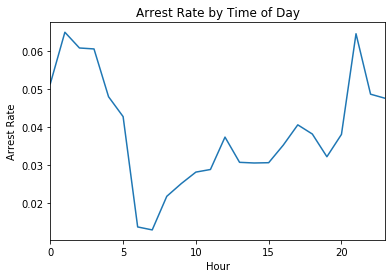

In [87]:
# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

In [89]:
ri.drugs_related_stop.head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: drugs_related_stop, dtype: bool

In [93]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


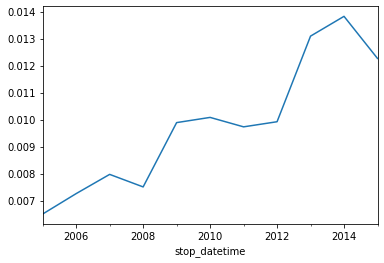

In [94]:
# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

In [96]:
ri.search_conducted.head()

stop_datetime
2005-01-04 12:55:00    False
2005-01-23 23:15:00    False
2005-02-17 04:15:00    False
2005-02-20 17:15:00    False
2005-02-24 01:20:00    False
Name: search_conducted, dtype: bool

In [98]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()
annual_search_rate

stop_datetime
2005-12-31    0.049167
2006-12-31    0.041758
2007-12-31    0.044056
2008-12-31    0.040310
2009-12-31    0.049861
2010-12-31    0.044805
2011-12-31    0.035682
2012-12-31    0.033616
2013-12-31    0.030022
2014-12-31    0.031801
2015-12-31    0.028497
Freq: A-DEC, Name: search_conducted, dtype: float64

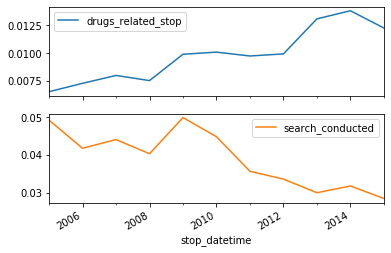

In [100]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate,annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

The rate of drug-related stops increased even though the search rate decreased.

## 5.0 Tallying Violations by District

### 5.1 Preparing the Data
New concept - the Crosstab method

In [101]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   
Zone X1          296               671    143                   38         74   
Zone X3         2049              3086    769                  671        820   
Zone X4         3541              5353   1560                 1411        843   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  
Zone X1        1119  
Zone X3        8779  
Zone X4        9795  


In [102]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

violation  Equipment  Moving violation  Other  Registration/plates  Seat belt  \
district                                                                        
Zone K1          672              1254    290                  120          0   
Zone K2         2061              2962    942                  768        481   
Zone K3         2302              2898    705                  695        638   

violation  Speeding  
district             
Zone K1        5960  
Zone K2       10448  
Zone K3       12322  


### 5.2 Charting the Data

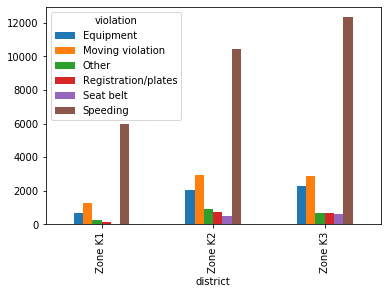

In [104]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

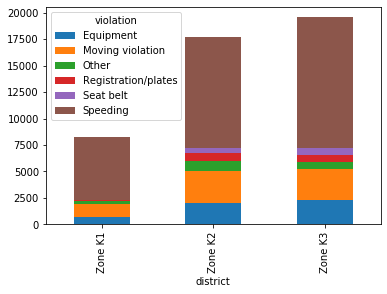

In [105]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

## 6.0 Length of Stop

### 6.1 Preparing the Data

In [107]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

['0-15 Min' '16-30 Min' '30+ Min']


In [109]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
mapping

{'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

In [114]:
# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [113]:
# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

[ 8 23 45]


In [115]:
ri.stop_minutes.head()

stop_datetime
2005-01-04 12:55:00     8
2005-01-23 23:15:00     8
2005-02-17 04:15:00     8
2005-02-20 17:15:00    23
2005-02-24 01:20:00     8
Name: stop_minutes, dtype: int64

In [116]:
ri.violation_raw.unique()

array(['Equipment/Inspection Violation', 'Speeding', 'Call for Service',
       'Other Traffic Violation', 'Registration Violation',
       'Special Detail/Directed Patrol', 'APB',
       'Motorist Assist/Courtesy', 'Suspicious Person',
       'Violation of City/Town Ordinance', 'Warrant',
       'Seatbelt Violation'], dtype=object)

In [118]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby(ri.violation_raw).stop_minutes.mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


In [120]:
# Save the resulting Series as 'stop_length'
stop_length = ri.groupby(ri.violation_raw).stop_minutes.mean()
stop_length

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64

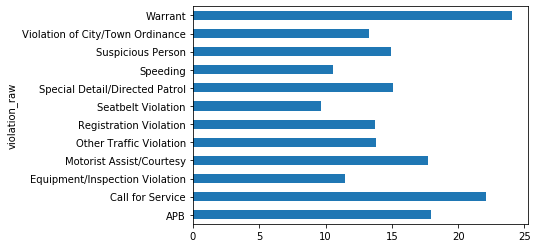

In [121]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values()

# Display the plot
stop_length.plot(kind='barh')
plt.show()